In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import fmin


# Mesure de la gravité sur l'antimatière

In [2]:
# Question 1 et 2

z0 = 0.3
g0 = 9.81
sigma_v = 1

def temps_de_vol(v0, g=g0):
    return (v0 + np.sqrt(v0**2 + 2*g*z0))/g

def vitesse_initiale(sigma_v=sigma_v, N=1000):
    return np.random.normal(0, sigma_v, N)

Text(0.5,0,'Temps de vol (s)')

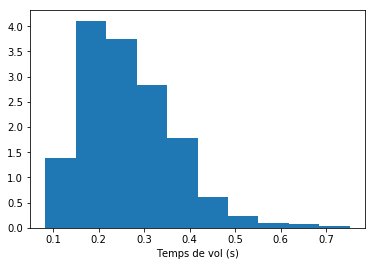

In [3]:
data = temps_de_vol(vitesse_initiale())

plt.hist(data, density=True);
plt.xlabel('Temps de vol (s)')

In [4]:
# Question 3

def estimateur_1(data, z0=z0):
    return 2*z0/np.mean(data**2)

Text(0.5,0,'g [m/s^2]')

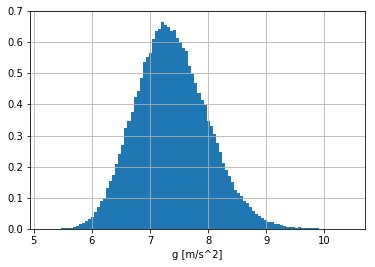

In [5]:
M = 100000
N = 100

out = []
for j in range(M):
    data = temps_de_vol(vitesse_initiale(N=100))
    out.append(estimateur_1(data))
out = np.array(out)
plt.hist(out, bins=100, density=True);
plt.grid(True)
plt.xlabel('g [m/s^2]')

In [6]:
print(np.mean(out))
print(np.std(out))


7.376747446276439
0.6179077593785869


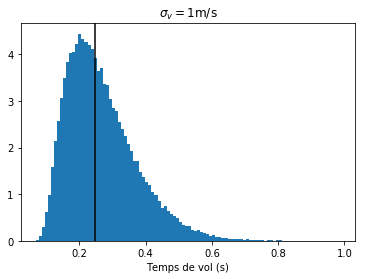

In [7]:
data = temps_de_vol(vitesse_initiale(N=100000))

plt.hist(data, density=True, bins=100);
plt.axvline(np.sqrt(2*z0/g0), color='k')
plt.xlabel('Temps de vol (s)')
plt.title('$\sigma_v = 1$m/s');

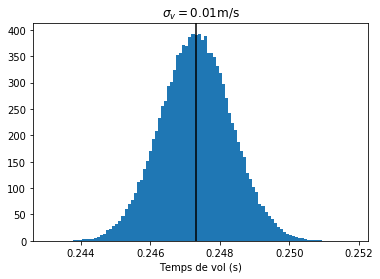

In [8]:
data = temps_de_vol(vitesse_initiale(sigma_v=0.01, N=100000))

plt.hist(data, density=True, bins=100);
plt.axvline(np.sqrt(2*z0/g0), color='k')
plt.xlabel('Temps de vol (s)')
plt.title('$\sigma_v = 0.01$m/s');


In [9]:
# Question 4
def v_ini(t, g, z0=z0):
    return g*t/2 - z0/t

def proba_v(v, sigma_v):
    return 1/(np.sqrt(2*np.pi)*sigma_v)*np.exp(-v**2/(2*sigma_v**2))

def proba_t(t, g, z0=z0, sigma_v=sigma_v):
    v = v_ini(t, g, z0=z0)
    return (g/2 + z0/t**2)*proba_v(v, sigma_v)

Text(0.5,0,'Temps de vol (s)')

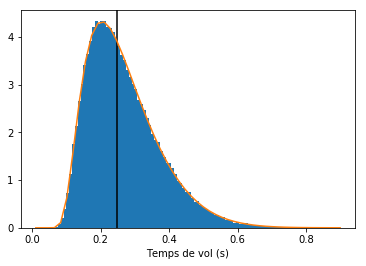

In [10]:
data = temps_de_vol(vitesse_initiale(N=100000))

plt.hist(data, density=True, bins=100);
plt.axvline(np.sqrt(2*z0/g0), color='k')

t_plot = np.linspace(0.01, 0.9)
plt.plot(t_plot, proba_t(t_plot, g=g0))
plt.xlabel('Temps de vol (s)')

Text(0.5,0,'g [m/s^2]')

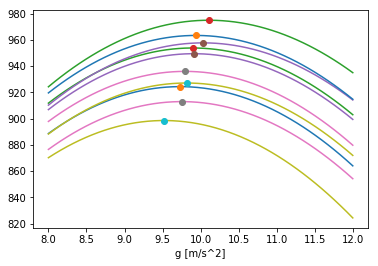

In [11]:
# Quesion 5

def _moins_log_vraissemblance(g, t, sigma_v=sigma_v, z0=z0): # g nombre
    return -np.sum(np.log(proba_t(t, g, z0=z0, sigma_v=sigma_v)))

def moins_log_vraissemblance(all_g, t, sigma_v=sigma_v, z0=z0): # g un tableau numpy
    out = []
    for g in all_g:
        out.append(_moins_log_vraissemblance(g, t, sigma_v=sigma_v, z0=z0))
    return np.array(out)


all_g = np.linspace(8, 12)

for _ in range(10):
    data = temps_de_vol(vitesse_initiale(N=1000))
    plt.plot(all_g, -moins_log_vraissemblance(all_g, data))
    g_max = np.array(fmin(moins_log_vraissemblance, 10, args=(data, sigma_v, z0), disp=0))
    plt.plot(g_max, -moins_log_vraissemblance(g_max, data), 'o')

plt.xlabel('g [m/s^2]')
    
#from scipy.optimize import fmin

#

Text(0.5,1,'Normalized likelihood')

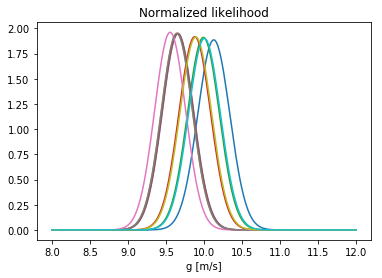

In [12]:
# Question 5 (normalisation)

def normed_like(log_like, all_g):
    log_like = log_like - np.max(log_like) # set max to 1
    like = np.exp(log_like)
    like = like/np.trapz(like, all_g)
    return like

all_g = np.linspace(8, 12, 201)

for _ in range(10):
    data = temps_de_vol(vitesse_initiale(N=1000))
    log_like = -moins_log_vraissemblance(all_g, data)
    plt.plot(all_g, normed_like(log_like, all_g))
#    g_max = np.array(fmin(moins_log_vraissemblance, 10, args=(data, sigma_v, z0), disp=0))
#    plt.plot(g_max, -moins_log_vraissemblance(g_max, data), 'o')

plt.xlabel('g [m/s]')    
plt.title('Normalized likelihood')

In [13]:
# Question 7
fmin(moins_log_vraissemblance, 10, args=(data, sigma_v, z0))

Optimization terminated successfully.
         Current function value: -942.251866
         Iterations: 14
         Function evaluations: 28


array([10.00598145])

Text(0.5,0,'g [m/s^2]')

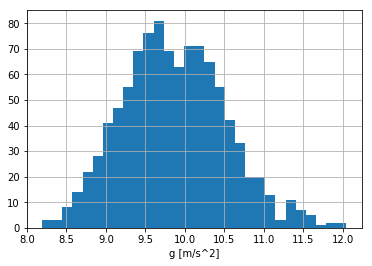

In [14]:
def estimateur_2(data, z0=z0):
    return fmin(moins_log_vraissemblance, 10, args=(data, sigma_v, z0), disp=0)[0]


M = 1000
N = 1000

out = []
for j in range(M):
    data = temps_de_vol(vitesse_initiale(N=100))
    out.append(estimateur_2(data))
out = np.array(out)
plt.hist(out, bins=30);
plt.grid(True)  
plt.xlabel('g [m/s^2]')

In [15]:
print('Relative Bias', (np.mean(out) - g0)/g0)
print('Relative uncertainty', np.std(out)/np.mean(out))

Relative Bias 0.005574121193297543
Relative uncertainty 0.06644771427667354


# Fit franges d'interférence

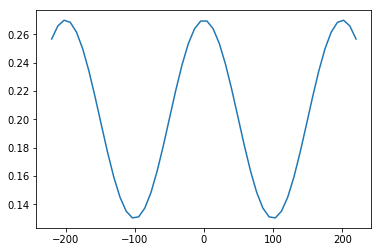

In [2]:
import numpy as np

def f(x, amplitude, offset, f_centre, interfrange):
    y = offset + amplitude * np.cos(2*np.pi*(x-f_centre)/interfrange)
    return y

x_plot = np.linspace(-220, 220)

plt.plot(x_plot, f(x_plot, 0.07, 0.2, 0, 200))



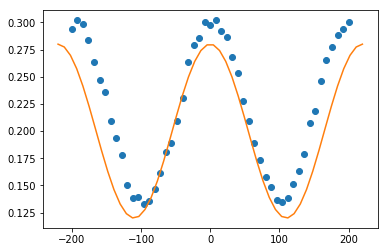

In [19]:
data = np.loadtxt('data/fit_sinus.dat')
data_x = data[:,0]
data_y = data[:,1]

plt.plot(data_x, data_y, 'o')

p_ini = [0.08, 0.2, 0, 220]
plt.plot(x_plot, f(x_plot, *p_ini))
# equivalent à plt.plot(x_plot, f(x_plot, p_ini[0], p_ini[1], p_ini[2], p_ini[3]))

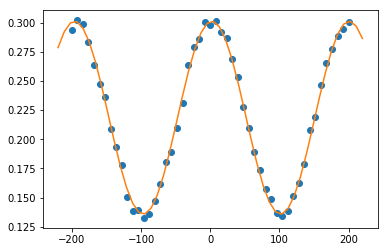

In [20]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(f, data_x, data_y, p_ini)
plt.plot(data_x, data_y, 'o')

plt.plot(x_plot, f(x_plot, *popt))

In [26]:
i_centre = 2
print('Valeur du centre', popt[i_centre])
print('Incertitude du centre', np.sqrt(pcov[i_centre, i_centre]))


Valeur du centre 2.3676756653724507
Incertitude du centre 0.31641174997198845


In [28]:
pcov

array([[6.62973175e-07, 6.42673233e-09, 1.09859033e-06, 6.10933187e-05],
       [6.42673233e-09, 3.93152557e-07, 7.35800387e-07, 1.46821645e-04],
       [1.09859033e-06, 7.35800387e-07, 1.00116396e-01, 5.79007126e-04],
       [6.10933187e-05, 1.46821645e-04, 5.79007126e-04, 3.71814439e-01]])

# Corrélations

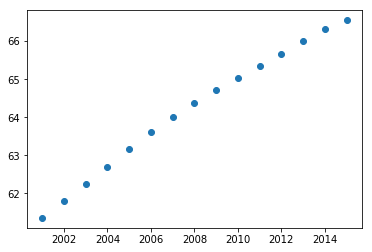

In [38]:
data = np.loadtxt('data/population_france.dat')

data_x, data_y = data[:,0], data[:,1]

data_y = data_y/1E6

plt.plot(data_x, data_y, 'o')

In [39]:
def f(x, a, b):
    return a*x + b

popt, pcov = curve_fit(f, data_x, data_y)

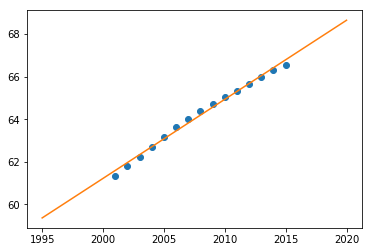

In [40]:

x_plot = np.linspace(1995, 2020)

plt.plot(data_x, data_y, 'o')
plt.plot(x_plot, f(x_plot, *popt))

In [63]:
a, b = popt
print(a)
print(b)
x = 2020
a*x + b

sigma_a = np.sqrt(pcov[0, 0])
sigma_b = np.sqrt(pcov[1, 1])
covarab = pcov[0, 1]
sigma_a

0.37128110357002697
-681.3390839061889


0.009145391020405071

In [50]:
# Ce qu'il ne faut pas faire 1:
# |sigma(a)*x| + |sigma(b)|
2020*sigma_a + sigma_b

36.837677571549946

In [52]:
# Ce qu'il ne faut pas faire 2:
# sigma^2 = (sigma(a)*x)^2 + (sigma(b))^2
np.sqrt( (2020*sigma_a)**2 + (sigma_b)**2)

26.04828711669333

In [53]:
# Ce qu'il faut faire : 
# sigma^2 = (sigma(a)*x)^2 + (sigma(b))^2 + 2*covar(a, b)*x
np.sqrt( (2020*sigma_a)**2 + (sigma_b)**2 + 2*covarab*x)

0.11664105927918653

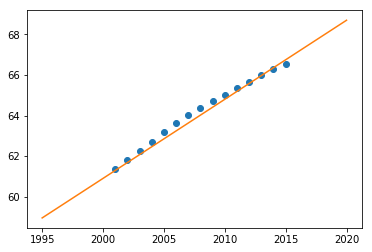

In [62]:
plt.plot(data_x, data_y, 'o')
pini =  [0.39, -681.3-37.8]

plt.plot(x_plot, f(x_plot, *pini))

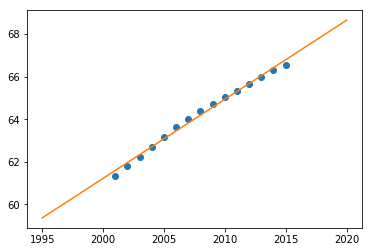

In [64]:
def f(x, a, b):
    return a*(x-2000) + b

popt, pcov = curve_fit(f, data_x, data_y)

x_plot = np.linspace(1995, 2020)

plt.plot(data_x, data_y, 'o')
plt.plot(x_plot, f(x_plot, *popt))

In [65]:
a, b = popt
print(a)
print(b)

sigma_a = np.sqrt(pcov[0, 0])
sigma_b = np.sqrt(pcov[1, 1])
covarab = pcov[0, 1]
print(sigma_a)
print(sigma_b)

0.3712811053507715
61.2231232243427
0.009145392440463293
0.08315101595189829


In [67]:
np.sqrt( (20*sigma_a)**2 + (sigma_b)**2)

0.2009213094966935

In [71]:
np.sqrt( (20*sigma_a)**2 + (sigma_b)**2 + 2*covarab*20)

0.11664110618531853